#### Important: Run "Sentiment_on_English_Reviews" notebook  first

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import time
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

from sklearn import naive_bayes
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('englishSentimentDF.csv', index_col = 0)

df.head()

,level_0,evaluation,orientation,Lemma_clean_eng_text,length,Vader_Compound,Vader_sentiment,Vader_score,TextBlob_polarity,TextBlob_subjectivity,TextBlob_sentiment,TextBlob_score
0,0,1,0,article address relevant contingent problem in...,362,0.9657,very positive,2,0.421429,0.612338,positive,1
1,0,1,1,article present practical recommendation devel...,416,0.9062,very positive,2,0.383333,0.504167,positive,1
2,0,1,1,theme interesting much help guide incorporate ...,797,0.9231,very positive,2,0.142857,0.325000,positive,1
3,1,2,1,ict use experience academic collaboration expl...,887,0.8920,positive,1,0.069231,0.468590,positive,1
4,1,2,0,author describe methodology developing collabo...,1180,0.9768,very positive,2,0.035840,0.462970,positive,1


<AxesSubplot:xlabel='Vader_sentiment', ylabel='count'>

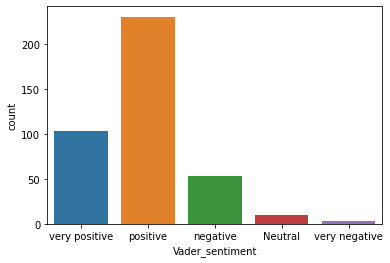

In [4]:
# Plot the Vader_sentiment column

#sns.countplot(x ='TextBlob_sentiment', data = df)
sns.countplot(x ='Vader_sentiment', data = df)

<AxesSubplot:xlabel='TextBlob_sentiment', ylabel='count'>

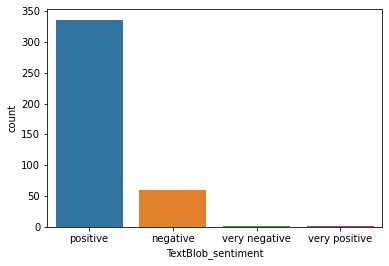

In [58]:
# Plot the TextBlob_sentiment column

#sns.countplot(x ='TextBlob_sentiment', data = df)
sns.countplot(x ='TextBlob_sentiment', data = df)

#### Sentiment Analysis with Support Vector Machines (SVM)

In [6]:
#  Using TextBlob_score as target values

X = df.Lemma_clean_eng_text.values
y = df.TextBlob_score.values

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [7]:
print('X_train: ', len(X_train))
print('X_test: ', len(X_test))
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

X_train:  299
X_test:  100
y_train:  299
y_test:  100


In [8]:
# Initializing the countvectorizer
vectorizer = CountVectorizer(binary = True)

# Vocabulary
vectorizer.fit(list(X_train)+ list(X_test))

# Create feature vectors
train_vectors = vectorizer.transform(X_train)
test_vectors = vectorizer.transform(X_test)

# Perform classification with SVM, kernel=linear

classifier_linear = svm.SVC(kernel='linear', probability = True)

# Fit the SVC model
prob = classifier_linear.fit(train_vectors, y_train).predict_proba(test_vectors)


prediction_linear = classifier_linear.predict(test_vectors)

# Accuracy score
print("Accuracy score for SVM is:", round(accuracy_score(y_test, prediction_linear)*100,2), '%')




Accuracy score for SVC is: 82.0 %


In [9]:
# Classification score
report = classification_report(y_test, prediction_linear)

print(report)

              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.38      0.19      0.25        16
           1       0.87      0.94      0.90        84

    accuracy                           0.82       100
   macro avg       0.41      0.38      0.38       100
weighted avg       0.79      0.82      0.80       100



In [10]:
# Using TextBlob_sentiment as target values

reviews = df.Lemma_clean_eng_text

X_tokens= [review.split() for review in reviews]

y = df.TextBlob_sentiment

# Transform our review inputs into binary vectors with the help of the class MultiLabelBinarizer

onehot_enc = MultiLabelBinarizer()
onehot_enc.fit(X_tokens)

X_train, X_test, y_train, y_test = train_test_split(X_tokens, y, test_size=0.25, random_state=None)

# Create our SVM classifier with the class LinearSVC and train it

lsvm = LinearSVC()
lsvm.fit(onehot_enc.transform(X_train), y_train) 

# After training, we use the score function to check the performance of the classifier:
sent_score = lsvm.score(onehot_enc.transform(X_test), y_test)

#sent_score
print('Score: ', str('{:04.2f}'.format(sent_score*100)) + '%')

Score:  86.00%


In [11]:
# Using TextBlob_score

reviews = df.Lemma_clean_eng_text

X_tokens= [review.split() for review in reviews]

y = df.TextBlob_score

# Transform our review inputs into binary vectors with the help of the class MultiLabelBinarizer

onehot_enc = MultiLabelBinarizer()
onehot_enc.fit(X_tokens)

X_train, X_test, y_train, y_test = train_test_split(X_tokens, y, test_size=0.25, random_state=None)

# Create our SVM classifier with the class LinearSVC and train it. 
# LinearSVC=Linear Support Vector Classifier

lsvm = LinearSVC()
lsvm.fit(onehot_enc.transform(X_train), y_train)

# After training, we use the score function to check the performance of the classifier:
score = lsvm.score(onehot_enc.transform(X_test), y_test)
#score
print('SVC Accuracy score: ', str('{:04.2f}'.format(score*100)) + '%')

SVC Accuracy score:  81.00%


#### Sentiment Analysis with Naive Bayes (NB)

In [12]:
# Using TextBlob_score

# Create feature vectors

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

X = vectorizer.fit_transform(df.Lemma_clean_eng_text) 
y = df.TextBlob_score

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

# Train the naive bayes classifier and fit the model
clf = naive_bayes.MultinomialNB()
clf.fit(X_train, y_train)

# Predict 
predictions = clf.predict(X_test)

# Testing the accuracy
# Model Accuracy, how often is the classifier correct?
accuracy_score = metrics.accuracy_score(predictions, y_test)

print('Accuracy score: ', str('{:04.2f}'.format(accuracy_score*100)) + '%')

Accuracy score:  76.00%


In [13]:
# Test
review = np.array(["The introduction provides a good, generalized background of the topic that quickly gives the reader an appreciation of the wide range of applications for this technology. However, to make the introduction more substantial, the author may wish to provide several references to substantiate the claim made in the first sentence"])
review_vector = vectorizer.transform(review)
print(clf.predict(review_vector))


[1]


### Sentiment analysis using neural networks RNN model

In [46]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [47]:
# https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e

In [48]:
df["length"].describe()

count     399.000000
mean      629.869674
std       504.488300
min        22.000000
25%       311.000000
50%       495.000000
75%       782.500000
max      3808.000000
Name: length, dtype: float64

In [49]:
### min review length is 22 
### max review length is 3808 

In [54]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(df.Lemma_clean_eng_text.values)

x = tokenizer.texts_to_sequences(df.Lemma_clean_eng_text.values)
x = pad_sequences(x) # padding our texts vectors so they all have the same length
x[:5]

array([[   0,    0,    0, ...,  233,  480,  137],
       [   0,    0,    0, ...,  356,  510, 1662],
       [   0,    0,    0, ...,  860,   27,    3],
       [   0,    0,    0, ...,  863, 1333, 2254],
       [   0,    0,    0, ...,  779,  632,   41]])

#### Creating the model

In [57]:
model = Sequential()
model.add(Embedding(4000, 22, input_lenght=x.shape(1)))
model.add(Dropout(0.3))
model.add(LSTM(22, return_sequence=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(22,dropout=0.0, recurrent_dropout=0.2 ))
model.add(Dense(3, activation='softmax'))

TypeError: 'tuple' object is not callable

In [ ]:
# Train and evaluate the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [51]:
X = df.Lemma_clean_eng_text
y = df.TextBlob_score

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
